In [6]:
import pandas as pd
df = pd.read_csv('serie_a_lgb_ready.csv')
df.head()

,10bet_1,10bet_2,10bet_X,10bet_opening_1,10bet_opening_2,10bet_opening_X,188bet_1,188bet_2,188bet_X,188bet_opening_1,...,home_team_rank,home_team_points,home_team_goal_difference,home_team_goal_fatti,home_team_goal_subiti,away_team_rank,away_team_points,away_team_goal_difference,away_team_goal_fatti,away_team_goal_subiti
0,3.63,2.08,3.12,3.52,2.14,3.08,4.00,2.09,3.30,3.90,...,0,0,0,0,0,0,0,0,0,0
1,4.19,1.89,3.20,4.28,1.83,3.25,4.34,1.97,3.35,4.30,...,0,0,0,0,0,0,0,0,0,0
2,1.20,12.71,5.82,1.24,12.54,5.87,1.25,15.50,6.25,1.21,...,0,0,0,0,0,0,0,0,0,0
3,2.69,2.70,3.16,2.65,2.74,3.12,2.80,2.75,3.20,2.74,...,0,0,0,0,0,0,0,0,0,0
4,2.16,3.35,3.29,2.24,3.22,3.20,2.13,3.55,3.50,2.17,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# features: quante volte era sfavorita e ha pareggiato, quante volte era sfavorita e ha vinto etc
d_played = dict(zip(sorted(set(df.home_team)), [0]*len(list(set(df.home_team)))))
d_odds_respected = dict(zip(sorted(set(df.home_team)), [0]*len(list(set(df.home_team)))))
d_percentage_respected = dict(zip(sorted(set(df.home_team)), [0]*len(list(set(df.home_team)))))
for t in zip(df.home_team, df['10bet_1'], df['10bet_2'],df['10bet_X'], df['label']):
    d_played[t[0]] +=1
    if min([t[1],t[2],t[3]]) == t[1] and t[4]==1:
        d_odds_respected[t[0]] +=1
        d_percentage_respected[t[0]] = d_odds_respected[t[0]]*100/d_played[t[0]]

In [8]:
import numpy as np
import matplotlib.pyplot as plt

<BarContainer object of 34 artists>

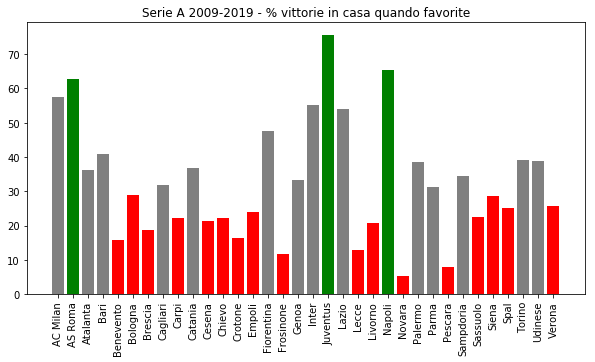

In [19]:
plt.rcParams['figure.figsize'] = [10, 5]
fig, ax = plt.subplots()
plt.xticks(rotation=90)
plt.title('Serie A 2009-2019 - % vittorie in casa quando favorite')
clrs=[]
for x in list(d_percentage_respected.values()):
    if x < 30: clrs.append('red')
    elif x > 60: clrs.append('green')
    else: clrs.append('grey')
ax.bar(*zip(*list(d_percentage_respected.items())),color=clrs)

# Ora tiriamo fuori le statistiche anno per anno

In [20]:
stats_win_home_favorite = pd.DataFrame(columns=['year','home_team','hw_perc_when_favorites'])

for y in range(2009,2019):
    df_year = df[df['league_year']==y]
    d_odds_respected = dict(zip(sorted(set(df_year.home_team)), [0]*len(list(set(df_year.home_team)))))
    for t in zip(df_year.home_team, df_year['10bet_1'], df_year['10bet_2'],df_year['10bet_X'], df_year['label']):
        if min([t[1],t[2],t[3]]) == t[1] and t[4]==1:
            d_odds_respected[t[0]] +=1
    for dk in d_odds_respected:
        stats_win_home_favorite = stats_win_home_favorite.append({'year':y,'home_team':dk,'hw_perc_when_favorites':d_odds_respected[dk]*100/19},ignore_index=True)     

In [21]:
stats_win_home_favorite.head()

,year,home_team,hw_perc_when_favorites
0,2009,AC Milan,63.157895
1,2009,AS Roma,78.947368
2,2009,Atalanta,36.842105
3,2009,Bari,42.105263
4,2009,Bologna,26.315789


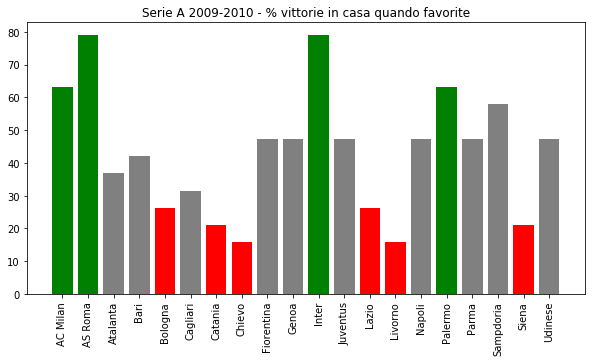

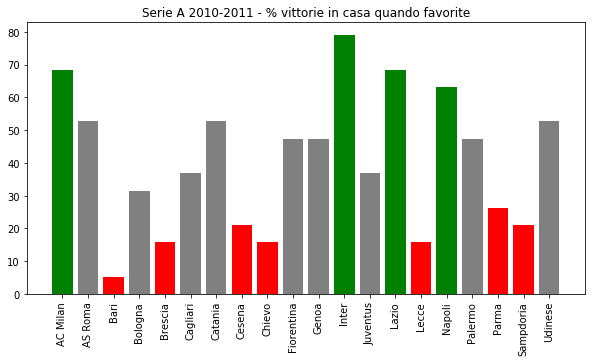

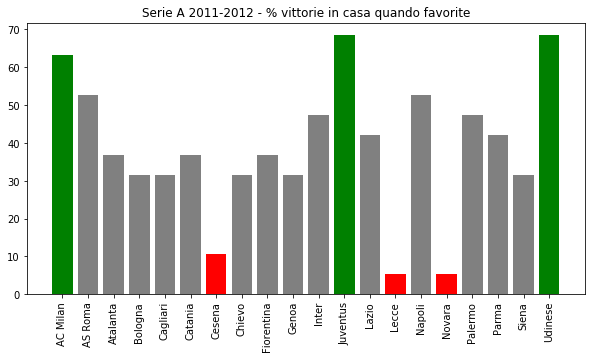

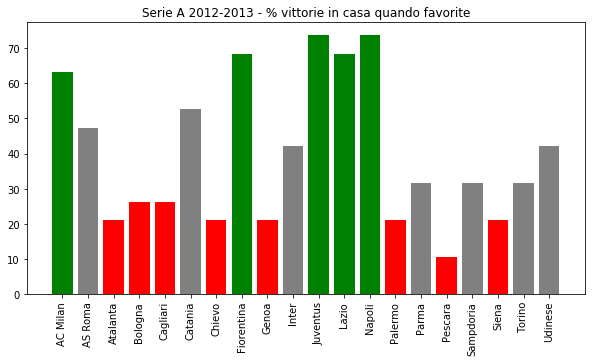

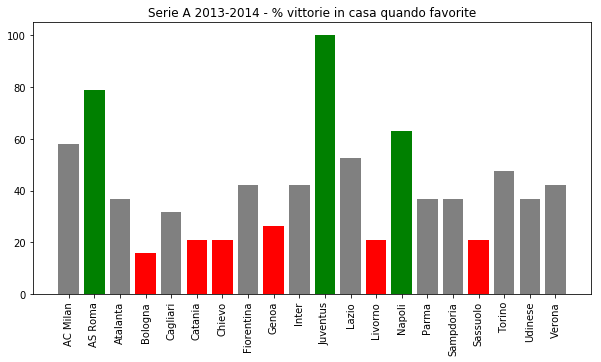

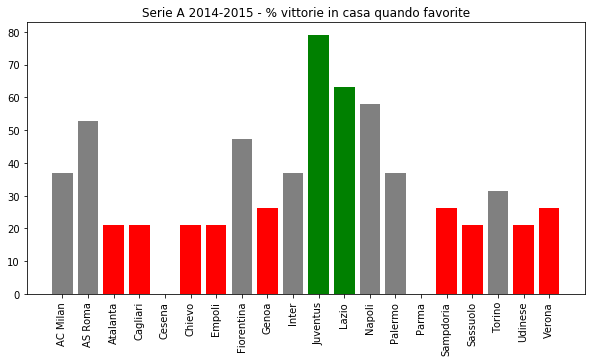

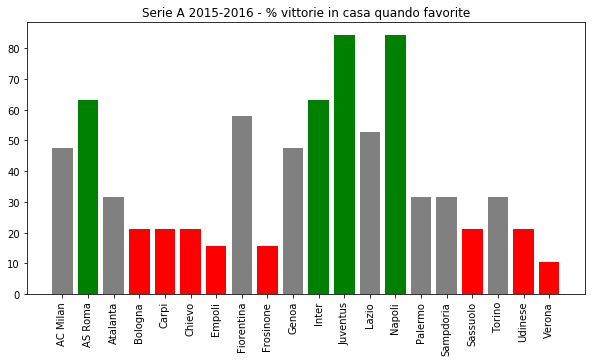

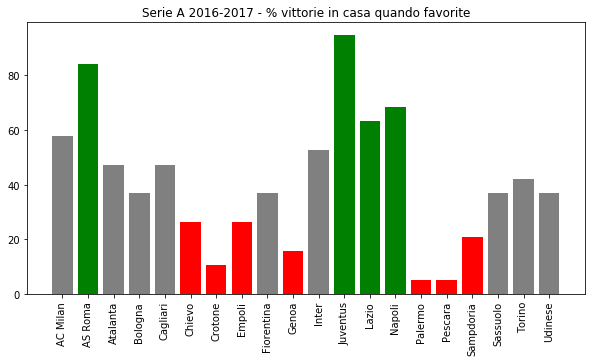

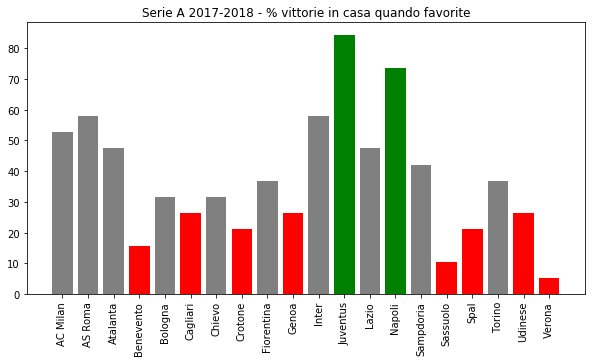

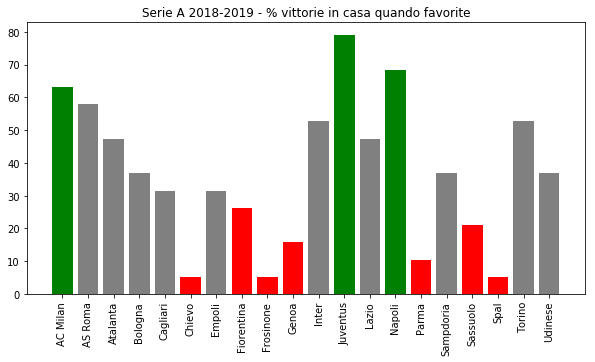

In [22]:
for y in range(2009,2019):
    fig, ax = plt.subplots()
    plt.xticks(rotation=90)
    plt.title(f'Serie A {y}-{y+1} - % vittorie in casa quando favorite')
    clrs=[]
    df_y = stats_win_home_favorite[stats_win_home_favorite.year == y]
    for x in list(df_y.hw_perc_when_favorites):
        if x < 30: clrs.append('red')
        elif x > 60: clrs.append('green')
        else: clrs.append('grey')
    ax.bar(*zip(*list(zip(df_y.home_team, df_y.hw_perc_when_favorites))),color=clrs)